In [1]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个数据，每个数据只有1个特征
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()

# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # model.parameters()自动完成参数的初始化操作，这个地方我可能理解错了
 
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    print(epoch, loss.item())
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

0 101.15626525878906
1 45.377777099609375
2 20.54180145263672
3 9.480631828308105
4 4.5516839027404785
5 2.3526995182037354
6 1.3690810203552246
7 0.9265800714492798
8 0.725033164024353
9 0.630818247795105
10 0.5844488739967346
11 0.5594437718391418
12 0.5440111756324768
13 0.5329015254974365
14 0.523777961730957
15 0.515597939491272
16 0.5078980922698975
17 0.5004693269729614
18 0.49321919679641724
19 0.4861052334308624
20 0.47910773754119873
21 0.4722168445587158
22 0.4654281437397003
23 0.45873844623565674
24 0.45214539766311646
25 0.4456466734409332
26 0.43924209475517273
27 0.43292948603630066
28 0.4267076253890991
29 0.42057520151138306
30 0.41453057527542114
31 0.4085733890533447
32 0.4027015268802643
33 0.39691418409347534
34 0.39120975136756897
35 0.3855874538421631
36 0.38004595041275024
37 0.3745840787887573
38 0.36920103430747986
39 0.3638947606086731
40 0.3586650788784027
41 0.3535103499889374
42 0.34842994809150696
43 0.34342214465141296
44 0.3384871482849121
45 0.3336223

In [1]:
import torch
# import torch.nn.functional as F
 
# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
 
#design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
 
    def forward(self, x):
        # y_pred = F.sigmoid(self.linear(x))
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()
 
# construct loss and optimizer
# 默认情况下，loss会基于element平均，如果size_average=False的话，loss会被累加。
criterion = torch.nn.BCELoss(size_average = False) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
 
# training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

d:\python\Python 3.11.6\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 2.6652917861938477
1 2.659518241882324
2 2.6539435386657715
3 2.648554563522339
4 2.643338680267334
5 2.6382851600646973
6 2.633382797241211
7 2.6286215782165527
8 2.6239919662475586
9 2.6194844245910645
10 2.6150918006896973
11 2.6108055114746094
12 2.606618881225586
13 2.6025240421295166
14 2.5985159873962402
15 2.594588279724121
16 2.5907349586486816
17 2.586951971054077
18 2.5832338333129883
19 2.5795764923095703
20 2.5759754180908203
21 2.572427272796631
22 2.5689280033111572
23 2.565474510192871
24 2.5620641708374023
25 2.5586938858032227
26 2.555360794067383
27 2.55206298828125
28 2.548797369003296
29 2.545562267303467
30 2.542356252670288
31 2.5391769409179688
32 2.536022663116455
33 2.5328922271728516
34 2.5297842025756836
35 2.5266969203948975
36 2.5236291885375977
37 2.5205800533294678
38 2.5175485610961914
39 2.514533519744873
40 2.5115339756011963
41 2.508549451828003
42 2.5055787563323975
43 2.502621650695801
44 2.4996771812438965
45 2.4967446327209473
46 2.493824005126

In [2]:
import math
import torch
pred = torch.tensor([[-0.2],[0.2],[0.8]])
target = torch.tensor([[0.0],[0.0],[1.0]])
 
sigmoid = torch.nn.Sigmoid()
pred_s = sigmoid(pred)
print(pred_s)
"""
pred_s 输出tensor([[0.4502],[0.5498],[0.6900]])
0*math.log(0.4502)+1*math.log(1-0.4502)
0*math.log(0.5498)+1*math.log(1-0.5498)
1*math.log(0.6900) + 0*log(1-0.6900)
"""
result = 0
i=0
for label in target:
    if label.item() == 0:
        result +=  math.log(1-pred_s[i].item())
    else:
        result += math.log(pred_s[i].item())
    i+=1
result /= 3
print("bce：", -result)
loss = torch.nn.BCELoss()
print('BCELoss:',loss(pred_s,target).item())

tensor([[0.4502],
        [0.5498],
        [0.6900]])
bce： 0.5891261081856343
BCELoss: 0.5891261100769043


0 0.6626883149147034
1 0.6608588695526123
2 0.6592336297035217
3 0.6577896475791931
4 0.6565060019493103
5 0.6553646922111511
6 0.6543495655059814
7 0.6534463763237
8 0.652642548084259
9 0.6519266963005066
10 0.651289165019989
11 0.65072101354599
12 0.6502145528793335
13 0.6497629284858704
14 0.6493600010871887
15 0.649000346660614
16 0.6486791372299194
17 0.6483923196792603
18 0.6481359004974365
19 0.6479065418243408
20 0.6477015614509583
21 0.6475180983543396
22 0.6473537087440491
23 0.6472066044807434
24 0.6470747590065002
25 0.6469565033912659
26 0.6468504071235657
27 0.6467552781105042
28 0.6466698050498962
29 0.646592915058136
30 0.6465238928794861
31 0.6464617252349854
32 0.6464057564735413
33 0.6463552713394165
34 0.6463097929954529
35 0.6462686657905579
36 0.646231472492218
37 0.6461978554725647
38 0.6461673378944397
39 0.6461395621299744
40 0.6461144089698792
41 0.6460914611816406
42 0.6460705399513245
43 0.6460513472557068
44 0.646033763885498
45 0.6460176706314087
46 0.6460

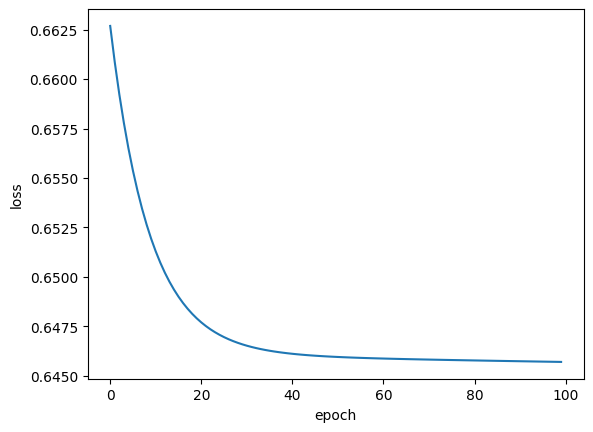

layer1_weight tensor([[ 0.0099, -0.1124,  0.1446,  0.3150, -0.1284, -0.3018,  0.1938, -0.0730],
        [ 0.2168, -0.1928,  0.0269, -0.3466, -0.0032,  0.3340, -0.1493, -0.0324],
        [-0.2531,  0.0189, -0.3494,  0.1629,  0.2313, -0.2962,  0.0722,  0.0089],
        [-0.0466,  0.0272,  0.2368,  0.2826,  0.0407, -0.1614,  0.0677,  0.1997],
        [ 0.1278,  0.1075, -0.1160,  0.0138,  0.1856,  0.1775, -0.1124, -0.3047],
        [ 0.1023,  0.2008,  0.3249, -0.0915,  0.1970,  0.3160, -0.0576,  0.1763]])
layer1_weight.shape torch.Size([6, 8])
layer1_bias tensor([ 0.1609,  0.0593,  0.2300,  0.2621, -0.3356,  0.2805])
layer1_bias.shape torch.Size([6])


In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset3
xy = np.loadtxt('./archive/diabetes.csv', delimiter=',',skiprows=1,dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
# 参数说明
# 第一层的参数：
layer1_weight = model.linear1.weight.data
layer1_bias = model.linear1.bias.data
print("layer1_weight", layer1_weight)
print("layer1_weight.shape", layer1_weight.shape)
print("layer1_bias", layer1_bias)
print("layer1_bias.shape", layer1_bias.shape)

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('./archive/diabetes.csv', delimiter=',',skiprows=1, dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 12)
        self.linear2 = torch.nn.Linear(12, 24)
        self.linear3 = torch.nn.Linear(24, 8)
        self.linear4 = torch.nn.Linear(8, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu=torch.nn.ReLU()
 
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x)) # y hat
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 
 
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%100 == 99:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)
 
 

input data.shape torch.Size([768, 8])
loss =  0.4816263020038605 acc =  0.7708333333333334


In [18]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
 
# prepare dataset
 
 
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', skiprows=1,dtype=np.float32)
        self.len = xy.shape[0] # shape(多少行，多少列)
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    def __len__(self):
        return self.len
 
 
dataset = DiabetesDataset('./archive/diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0) #num_workers 多线程
 
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
 
 
model = Model()
 
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
# training cycle forward, backward, update
if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0): # train_loader 是先shuffle后mini_batch
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            print(epoch, i, loss.item())
 
            optimizer.zero_grad()
            loss.backward()
 
            optimizer.step()

0 0 0.711250364780426
0 1 0.627316951751709
0 2 0.724602222442627
0 3 0.663202702999115
0 4 0.6876530647277832
0 5 0.6403051614761353
0 6 0.6516090631484985
0 7 0.6628326177597046
0 8 0.6379124522209167
0 9 0.6641607284545898
0 10 0.6746559143066406
0 11 0.6392221450805664
0 12 0.626162052154541
0 13 0.6268497705459595
0 14 0.6387620568275452
0 15 0.637794017791748
0 16 0.7254856824874878
0 17 0.5895373821258545
0 18 0.7269176244735718
0 19 0.6388452649116516
0 20 0.6630675196647644
0 21 0.624599277973175
0 22 0.5617324709892273
0 23 0.6259200572967529
1 0 0.649983286857605
1 1 0.6123523116111755
1 2 0.637252688407898
1 3 0.7266359329223633
1 4 0.6103854775428772
1 5 0.6738078594207764
1 6 0.6513255834579468
1 7 0.6892512440681458
1 8 0.6233562231063843
1 9 0.661724865436554
1 10 0.6091856956481934
1 11 0.6631407141685486
1 12 0.6494914889335632
1 13 0.6635128855705261
1 14 0.661879301071167
1 15 0.6754722595214844
1 16 0.6355145573616028
1 17 0.6224175095558167
1 18 0.6367251873016357

> 以下为划分训练测试集的diabetes：

In [22]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
 
 
# 读取原始数据，并划分训练集和测试集
raw_data = np.loadtxt('./archive/diabetes.csv', delimiter=',',skiprows=1, dtype=np.float32)
X = raw_data[:, :-1]
y = raw_data[:, [-1]]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
Xtest = torch.from_numpy(Xtest)
Ytest = torch.from_numpy(Ytest)
 
# 将训练数据集进行批量处理
# prepare dataset
 
class DiabetesDataset(Dataset):
    def __init__(self, data,label):
 
        self.len = data.shape[0] # shape(多少行，多少列)
        self.x_data = torch.from_numpy(data)
        self.y_data = torch.from_numpy(label)
 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    def __len__(self):
        return self.len
 
 
train_dataset = DiabetesDataset(Xtrain,Ytrain)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0) #num_workers 多线程
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x
 
 
model = Model()
 
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
 
# training cycle forward, backward, update
 
def train(epoch):
    train_loss = 0.0
    count = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_pred = model(inputs)
 
        loss = criterion(y_pred, labels)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        count = i
 
    if epoch%2000 == 99:
        print("train loss:", train_loss/count,end=',')
 
 
def test():
    with torch.no_grad():
        y_pred = model(Xtest)
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
        acc = torch.eq(y_pred_label, Ytest).sum().item() / Ytest.size(0)
        print("test acc:", acc)
 
if __name__ == '__main__':
    for epoch in range(100):
        train(epoch)
        if epoch%2000==99:
            test()
 

train loss: 0.6839223466813564,test acc: 0.6406926406926406


>  逐渐开始复杂

In [24]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
 
# prepare dataset
 
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # 归一化,均值和方差
 
train_dataset = datasets.MNIST(root='./dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='./dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
 
# design model using class
 
 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784, 512)
        self.l2 = torch.nn.Linear(512, 256)
        self.l3 = torch.nn.Linear(256, 128)
        self.l4 = torch.nn.Linear(128, 64)
        self.l5 = torch.nn.Linear(64, 10)
 
    def forward(self, x):
        x = x.view(-1, 784)  # -1其实就是自动获取mini_batch
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)  # 最后一层不做激活，不进行非线性变换
 
 
model = Net()
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
# training cycle forward, backward, update
 
 
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        # 获得一个批次的数据和标签
        inputs, target = data
        optimizer.zero_grad()
        # 获得模型预测结果(64, 10)
        outputs = model(inputs)
        # 交叉熵代价函数outputs(64,10),target（64）
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
    print(batch_idx)
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1) # dim = 1 列是第0个维度，行是第1个维度
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # 张量之间的比较运算
    print('accuracy on test set: %d %% ' % (100*correct/total))
 
 
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,   300] loss: 2.215
[1,   600] loss: 0.871
[1,   900] loss: 0.411
937
accuracy on test set: 90 % 
[2,   300] loss: 0.309
[2,   600] loss: 0.264
[2,   900] loss: 0.235
937
accuracy on test set: 94 % 
[3,   300] loss: 0.196
[3,   600] loss: 0.174
[3,   900] loss: 0.157
937
accuracy on test set: 95 % 
[4,   300] loss: 0.140
[4,   600] loss: 0.125
[4,   900] loss: 0.119
937
accuracy on test set: 96 % 
[5,   300] loss: 0.104
[5,   600] loss: 0.102
[5,   900] loss: 0.092
937
accuracy on test set: 96 % 
[6,   300] loss: 0.078
[6,   600] loss: 0.079
[6,   900] loss: 0.080
937
accuracy on test set: 97 % 
[7,   300] loss: 0.063
[7,   600] loss: 0.069
[7,   900] loss: 0.061
937
accuracy on test set: 97 % 
[8,   300] loss: 0.049
[8,   600] loss: 0.053
[8,   900] loss: 0.054
937
accuracy on test set: 97 % 
[9,   300] loss: 0.041
[9,   600] loss: 0.044
[9,   900] loss: 0.042
937
accuracy on test set: 97 % 
[10,   300] loss: 0.033
[10,   600] loss: 0.033
[10,   900] loss: 0.039
937
accuracy on tes

[1,   300] loss: 0.609
[1,   600] loss: 0.183
[1,   900] loss: 0.135
accuracy on test set: 97 % 
[2,   300] loss: 0.111
[2,   600] loss: 0.094
[2,   900] loss: 0.087
accuracy on test set: 98 % 
[3,   300] loss: 0.076
[3,   600] loss: 0.073
[3,   900] loss: 0.069
accuracy on test set: 98 % 
[4,   300] loss: 0.069
[4,   600] loss: 0.056
[4,   900] loss: 0.055
accuracy on test set: 98 % 
[5,   300] loss: 0.052
[5,   600] loss: 0.054
[5,   900] loss: 0.051
accuracy on test set: 98 % 
[6,   300] loss: 0.047
[6,   600] loss: 0.048
[6,   900] loss: 0.047
accuracy on test set: 98 % 
[7,   300] loss: 0.046
[7,   600] loss: 0.044
[7,   900] loss: 0.040
accuracy on test set: 98 % 
[8,   300] loss: 0.036
[8,   600] loss: 0.045
[8,   900] loss: 0.039
accuracy on test set: 98 % 
[9,   300] loss: 0.035
[9,   600] loss: 0.033
[9,   900] loss: 0.042
accuracy on test set: 98 % 
[10,   300] loss: 0.031
[10,   600] loss: 0.037
[10,   900] loss: 0.037
accuracy on test set: 98 % 


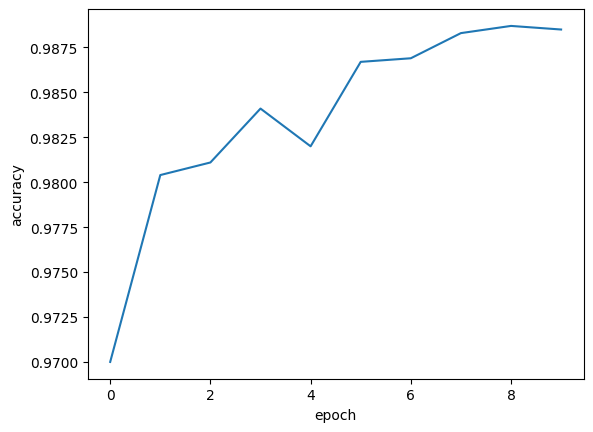

In [25]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
 
# prepare dataset
 
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
 
train_dataset = datasets.MNIST(root='./dataset/mnist/', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='./dataset/mnist/', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
 
# design model using class
 
 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
 
 
    def forward(self, x):
        # flatten data from (n,1,28,28) to (n, 784)
        
        batch_size = x.size(0) #此句何意
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1) # -1 此处自动算出的是320
        # print("x.shape",x.shape)
        x = self.fc(x)
 
        return x
 
 
model = Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
# training cycle forward, backward, update
 
 
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100*correct/total))
    return correct/total
 
 
if __name__ == '__main__':
    epoch_list = []
    acc_list = []
    
    for epoch in range(10):
        train(epoch)
        acc = test()
        epoch_list.append(epoch)
        acc_list.append(acc)
    
    plt.plot(epoch_list,acc_list)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
 
    